## **PASSO 0: IMPORTANDO AS BIBLIOTECAS**

In [18]:
## carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, multilabel_confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

## **PASSO 1: CARREGANDO MYOCARDIAL INFARCTION COMPLICATIONS DATASET COM PANDAS**

In [5]:
## importando dados do dataset para um dataframe
# Carrega arquivo csv usando Pandas usando uma URL
# Informa a URL de importação do dataset
url = "https://figshare.le.ac.uk/ndownloader/files/23581310"

# Lê o arquivo
dataset = pd.read_csv(url)

## **PASSO 2: CONHECENDO OS DADOS**

In [6]:
## visualizando as colunas de dados
dataset

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,...,0,0,0,1,0,0,0,0,0,1


In [7]:
## descrevendo os dados
dataset.describe()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1700.000000,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,490.892045,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
## tipos de cada atributo
print(dataset.dtypes)

ID             int64
AGE          float64
SEX            int64
INF_ANAM     float64
STENOK_AN    float64
              ...   
DRESSLER       int64
ZSN            int64
REC_IM         int64
P_IM_STEN      int64
LET_IS         int64
Length: 124, dtype: object


## **PASSO 3 : PRÉ-PROCESSAMENTO DOS DADOS**

In [9]:
## tratamentos dos valores faltantes
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')
idf=pd.DataFrame(imp.fit_transform(dataset))
idf.columns=dataset.columns
idf.index=dataset.index

idf

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.0,77.0,1.0,2.0,1.000000,1.000000,2.000000,0.375,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,55.0,1.0,1.0,0.000000,0.000000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,52.0,1.0,0.0,0.000000,0.000000,2.000000,0.375,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,68.0,0.0,0.0,0.000000,0.000000,2.000000,0.375,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,60.0,1.0,0.0,0.000000,0.000000,2.000000,0.375,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696.0,77.0,0.0,0.0,4.000000,2.000000,1.000000,0.375,2.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
1696,1697.0,70.0,0.0,0.0,6.000000,2.000000,1.000000,0.375,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1697,1698.0,55.0,1.0,3.0,6.000000,2.000000,2.000000,0.375,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0
1698,1699.0,79.0,0.0,2.0,2.000000,2.000000,1.000000,0.375,2.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
# preencher as células diferentes de 0 com 1 no atributo LET_IS(0: Alive, 1: Dead) 
idf['LET_IS'] = idf['LET_IS'].apply(lambda x: 1 if x != 0 else 0)

# exibir o dataframe resultante
print(idf)

          ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0        1.0  77.0  1.0       2.0   1.000000   1.000000  2.000000     0.375   
1        2.0  55.0  1.0       1.0   0.000000   0.000000  0.000000     0.000   
2        3.0  52.0  1.0       0.0   0.000000   0.000000  2.000000     0.375   
3        4.0  68.0  0.0       0.0   0.000000   0.000000  2.000000     0.375   
4        5.0  60.0  1.0       0.0   0.000000   0.000000  2.000000     0.375   
...      ...   ...  ...       ...        ...        ...       ...       ...   
1695  1696.0  77.0  0.0       0.0   4.000000   2.000000  1.000000     0.375   
1696  1697.0  70.0  0.0       0.0   6.000000   2.000000  1.000000     0.375   
1697  1698.0  55.0  1.0       3.0   6.000000   2.000000  2.000000     0.375   
1698  1699.0  79.0  0.0       2.0   2.000000   2.000000  1.000000     0.375   
1699  1700.0  63.0  1.0       2.0   2.316186   1.205286  1.160703     0.375   

       GB  SIM_GIPERT  ...  JELUD_TAH  FIBR_JELUD  

In [11]:
## dropando o atributo 1 ID da tabela já que ele é apenas um identificador do paciente
idf = idf.drop(columns=['ID'])

# exibir o dataframe resultante
print(idf)

       AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0     77.0  1.0       2.0   1.000000   1.000000  2.000000     0.375  3.0   
1     55.0  1.0       1.0   0.000000   0.000000  0.000000     0.000  0.0   
2     52.0  1.0       0.0   0.000000   0.000000  2.000000     0.375  2.0   
3     68.0  0.0       0.0   0.000000   0.000000  2.000000     0.375  2.0   
4     60.0  1.0       0.0   0.000000   0.000000  2.000000     0.375  3.0   
...    ...  ...       ...        ...        ...       ...       ...  ...   
1695  77.0  0.0       0.0   4.000000   2.000000  1.000000     0.375  2.0   
1696  70.0  0.0       0.0   6.000000   2.000000  1.000000     0.375  2.0   
1697  55.0  1.0       3.0   6.000000   2.000000  2.000000     0.375  0.0   
1698  79.0  0.0       2.0   2.000000   2.000000  1.000000     0.375  2.0   
1699  63.0  1.0       2.0   2.316186   1.205286  1.160703     0.375  2.0   

      SIM_GIPERT  DLIT_AG  ...  JELUD_TAH  FIBR_JELUD  A_V_BLOK  OTEK_LANC  \
0        

In [12]:
## Padronizando os dados
colunas = idf.columns

scaler_standard = StandardScaler()
idf_padronizado = pd.DataFrame(scaler_standard.fit_transform(idf), columns=colunas)

idf_padronizado.head()


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1.348433,0.772168,1.729557,-0.557108,-0.201674,1.063683,0.000000,1.480054,-0.187156,1.278421,...,-0.159159,-0.20877,-0.18626,-0.321216,-0.181126,-0.214834,-0.549258,-0.321216,-0.308805,-0.43548
1,-0.610589,0.772168,0.532768,-0.980383,-1.184081,-1.471018,-3.763863,-1.283404,-0.187156,-1.166793,...,-0.159159,-0.20877,-0.18626,-0.321216,-0.181126,-0.214834,-0.549258,-0.321216,-0.308805,-0.43548
2,-0.877729,0.772168,-0.664020,-0.980383,-1.184081,1.063683,0.000000,0.558902,-0.187156,-0.468161,...,-0.159159,-0.20877,-0.18626,-0.321216,-0.181126,-0.214834,-0.549258,-0.321216,-0.308805,-0.43548
3,0.547015,-1.295054,-0.664020,-0.980383,-1.184081,1.063683,0.000000,0.558902,-0.187156,-0.118845,...,-0.159159,-0.20877,-0.18626,-0.321216,-0.181126,-0.214834,1.820637,-0.321216,-0.308805,-0.43548
4,-0.165357,0.772168,-0.664020,-0.980383,-1.184081,1.063683,0.000000,1.480054,-0.187156,1.278421,...,-0.159159,-0.20877,-0.18626,-0.321216,-0.181126,-0.214834,-0.549258,-0.321216,-0.308805,-0.43548


In [13]:
## Normalizando os dados
scaler_minMax = MinMaxScaler() 
idf_normalized = pd.DataFrame(scaler_minMax.fit_transform(idf), columns=colunas)
idf_normalized.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0.772727,1.0,0.666667,0.166667,0.25,1.0,0.375,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.439394,1.0,0.333333,0.000000,0.00,0.0,0.000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.393939,1.0,0.000000,0.000000,0.00,1.0,0.375,0.666667,0.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.636364,0.0,0.000000,0.000000,0.00,1.0,0.375,0.666667,0.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.515152,1.0,0.000000,0.000000,0.00,1.0,0.375,1.000000,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **PASSO 4: AVALIAÇÃO DOS MODELOS DE CLASSIFICAÇÃO**

LogisticRegression: 0.863866 (0.029544)
KNN: 0.850420 (0.033148)
DecisionTreeClassifier: 0.842857 (0.027629)


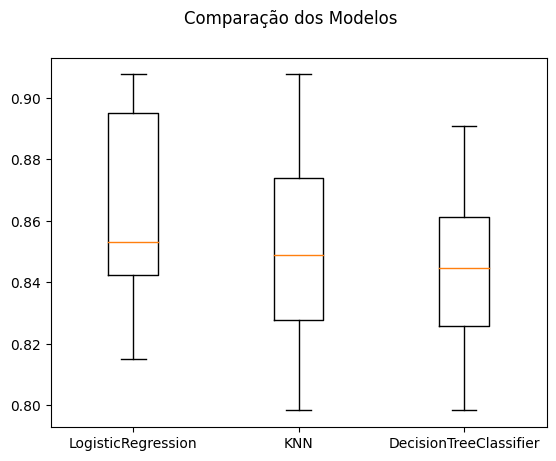

In [14]:
## iremos utilizar os dados normalizados
## como target unitário iremos avaliar o parâmetro LET_IS
X = idf_normalized.iloc[:, 0:112]
Y = idf_normalized.iloc[:, 122]

## separando em dados de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                      Y, 
                                                      test_size=0.30, 
                                                      random_state=0)

## iremos utilizar a validação cruzada e serão avaliados 3 modelos usando a métrica de acurácia
num_folds = 10
scoring = 'accuracy'

## Criação dos modelos
models = []
models.append(('LogisticRegression', LogisticRegression(solver='newton-cg'))) ## Regressão Logística 
models.append(('KNN', KNeighborsClassifier())) ## K-vizinhos mais próximos (KNN)
models.append(('DecisionTreeClassifier', DecisionTreeClassifier())) ## Árvores de Decisão

## definindo uma semente global
np.random.seed(7)

## Avaliação dos modelos
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

## Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### **PASSO 4.1: AJUSTANDO OS HIPERPARÂMETROS DO KNN**

In [15]:
## definindo uma semente global
np.random.seed(7)

## Ajuste do KNN
k = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_grid = dict(n_neighbors=k, metric=distancias)

model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, y_train)
print("Melhor: %f usando %s" %(grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f): %r" % (mean, stdev, param))

Melhor: 0.863025 usando {'metric': 'manhattan', 'n_neighbors': 3}
0.843697 (0.035494): {'metric': 'euclidean', 'n_neighbors': 1}
0.855462 (0.035013): {'metric': 'euclidean', 'n_neighbors': 3}
0.850420 (0.033148): {'metric': 'euclidean', 'n_neighbors': 5}
0.847059 (0.032065): {'metric': 'euclidean', 'n_neighbors': 7}
0.844538 (0.031499): {'metric': 'euclidean', 'n_neighbors': 9}
0.847059 (0.028323): {'metric': 'euclidean', 'n_neighbors': 11}
0.845378 (0.032153): {'metric': 'euclidean', 'n_neighbors': 13}
0.844538 (0.031722): {'metric': 'euclidean', 'n_neighbors': 15}
0.843697 (0.031487): {'metric': 'euclidean', 'n_neighbors': 17}
0.843697 (0.031487): {'metric': 'euclidean', 'n_neighbors': 19}
0.843697 (0.031487): {'metric': 'euclidean', 'n_neighbors': 21}
0.852941 (0.032816): {'metric': 'manhattan', 'n_neighbors': 1}
0.863025 (0.030077): {'metric': 'manhattan', 'n_neighbors': 3}
0.857983 (0.031092): {'metric': 'manhattan', 'n_neighbors': 5}
0.854622 (0.026851): {'metric': 'manhattan', '

### **PASSO 4.2: AJUSTADO OS HIPERPARÂMETROS DA ÁRVORE DE DECISÃO**

---



In [16]:
## definindo uma semente global
np.random.seed(7)

## Ajuste da Árvore de Decisão
params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'best'}


## **PASSO 5: EXECUTANDO O MODELO DE LOGISTIC REGRESSION**


Accuracy score =  0.8764705882352941


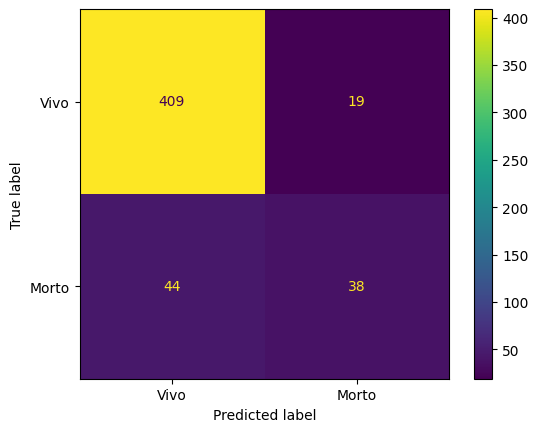

              precision    recall  f1-score   support

        Vivo       0.90      0.96      0.93       428
       Morto       0.67      0.46      0.55        82

    accuracy                           0.88       510
   macro avg       0.78      0.71      0.74       510
weighted avg       0.86      0.88      0.87       510



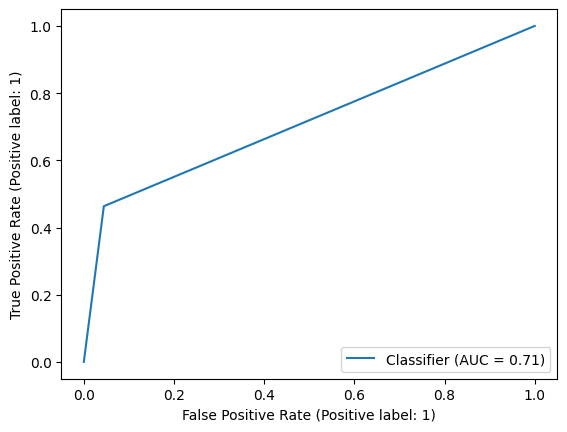

In [21]:
 # definindo uma semente global
np.random.seed(7)

## Preparação do modelo
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

## Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test, predictions))

## Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ["Vivo", "Morto"]
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format="d")
plt.show()
print(classification_report(y_test, predictions, target_names=labels))

## Plot ROC curve given the true and predicted values
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

## **PASSO 6: EXECUTANDO O MODELO DE KNN COM O AJUSTE DE HIPERPARÂMETROS**


Accuracy score =  0.8568627450980392


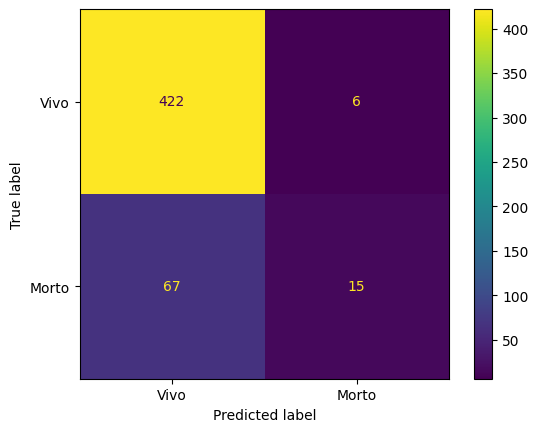

              precision    recall  f1-score   support

        Vivo       0.86      0.99      0.92       428
       Morto       0.71      0.18      0.29        82

    accuracy                           0.86       510
   macro avg       0.79      0.58      0.61       510
weighted avg       0.84      0.86      0.82       510



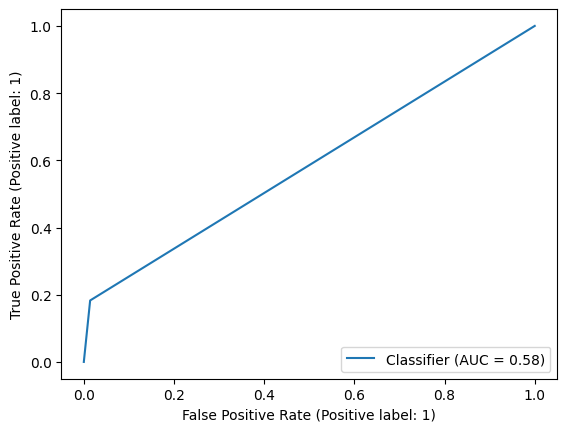

In [22]:
 # definindo uma semente global
np.random.seed(7)

## Preparação do modelo
## Melhor: 0.861345 usando {'metric': 'manhattan', 'n_neighbors': 3}
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(X_train, y_train)

## Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test, predictions))

## Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ["Vivo", "Morto"]
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format="d")
plt.show()
print(classification_report(y_test, predictions, target_names=labels))

## Plot ROC curve given the true and predicted values
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

## **PASSO 7: EXECUTANDO O MODELO DE DECISION TREE CLASSIFIER**


Accuracy score =  0.9058823529411765


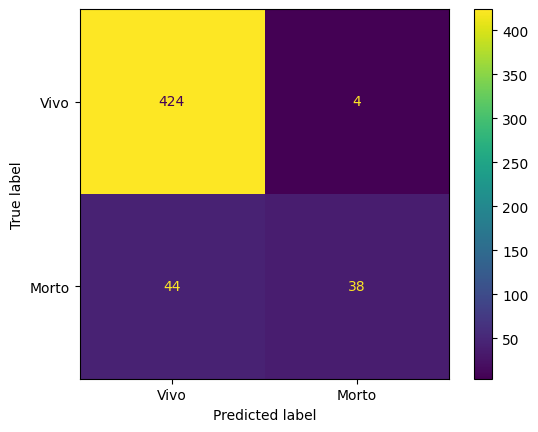

              precision    recall  f1-score   support

        Vivo       0.91      0.99      0.95       428
       Morto       0.90      0.46      0.61        82

    accuracy                           0.91       510
   macro avg       0.91      0.73      0.78       510
weighted avg       0.91      0.91      0.89       510



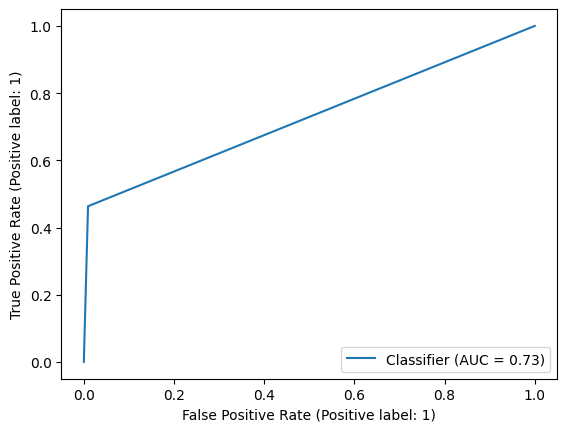

In [23]:
 # definindo uma semente global
np.random.seed(7)

## Preparação do modelo
## {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'best'}
model = DecisionTreeClassifier(criterion='gini', max_depth=2, max_features=None, splitter='best')
model.fit(X_train, y_train)

## Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(y_test, predictions))

## Matriz de confusão
cm = confusion_matrix(y_test, predictions)
labels = ["Vivo", "Morto"]
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format="d")
plt.show()
print(classification_report(y_test, predictions, target_names=labels))

## Plot ROC curve given the true and predicted values
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

## **CURIOSIDADES EXTRAS -> NÃO FOI UTILIZADO NO ARTIGO**

In [24]:
def linear_classification_model(dataset):
  X = dataset.iloc[:, 0:112]
  Y = dataset.iloc[:, 122]

  # separando em dados de treino e teste 
  X_train, X_test, y_train, y_test = train_test_split(X, 
                                                      Y, 
                                                      test_size=0.30, 
                                                      random_state=42)

  # instanciando o modelo Logistic Regression
  model = LogisticRegression(solver='lbfgs', max_iter=10000)

  # treinando o modelo
  model.fit(X_train, y_train)

  # prevendo os valores
  y_predict = model.predict(X_test)

  # avaliando o modelo (quanto mais próximo de 1 melhor)
  print("accuracy:", accuracy_score(y_test, y_predict))

  ## Plot Matriz de Confusão
  ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predict), display_labels=model.classes_).plot()
  plt.grid(False)
  plt.show()

  ## Gráfico do Resultado do treinamento do modelo

In [25]:
def linear_classification_model_multiOutput(dataset):
  X = dataset.iloc[:, 0:112]
  Y = dataset.iloc[:, 112:123]

  # separando em dados de treino e teste 
  X_train, X_test, y_train, y_test = train_test_split(X, 
                                                      Y, 
                                                      test_size=0.30, 
                                                      random_state=42)

  # instanciando o modelo Logistic Regression
  model = MultiOutputClassifier(estimator=LogisticRegression(solver='lbfgs', max_iter=10000))

  # treinando o modelo
  model.fit(X_train, y_train)

  # prevendo os valores
  y_predict = model.predict(X_test)

  # avaliando o modelo (quanto mais próximo de 1 melhor)
  print("accuracy:", accuracy_score(y_test, y_predict))

  ## Plot Matriz de Confusão
  confusion_matrices = multilabel_confusion_matrix(y_test, y_predict)
  for confusion_matrix in confusion_matrices:
    disp = ConfusionMatrixDisplay(confusion_matrix, display_labels=model.classes_[0])
    disp.plot(include_values=True, cmap="viridis", ax=None, xticks_rotation="vertical")
    plt.show()

Dataset não padronizado
accuracy: 0.8764705882352941


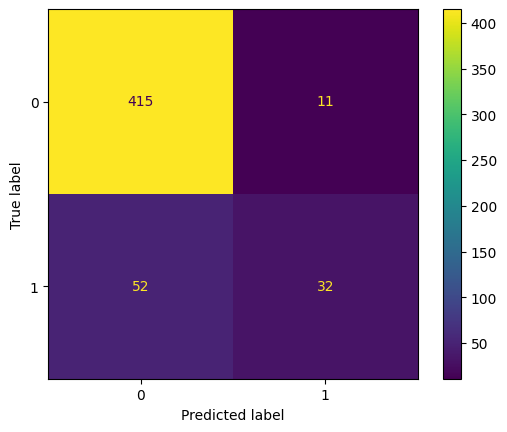

In [31]:
print("Dataset não padronizado")
linear_classification_model(idf)


Dataset não padronizado
accuracy: 0.4627450980392157


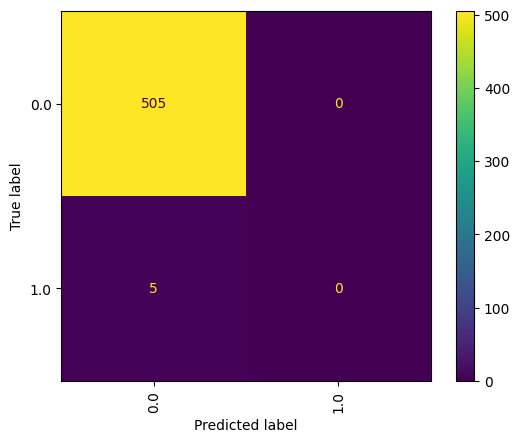

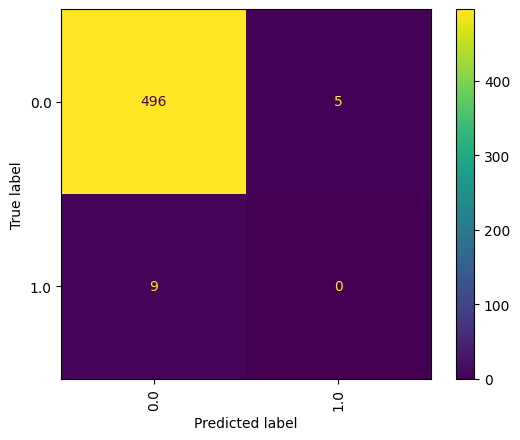

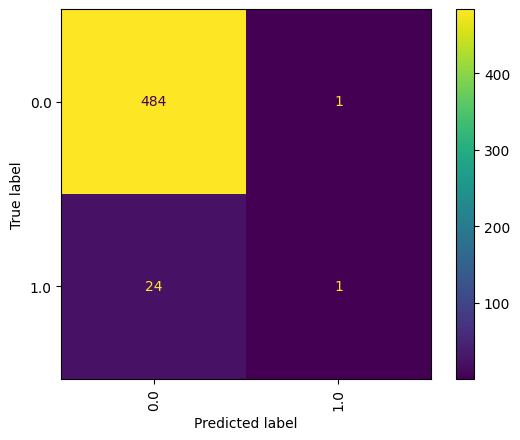

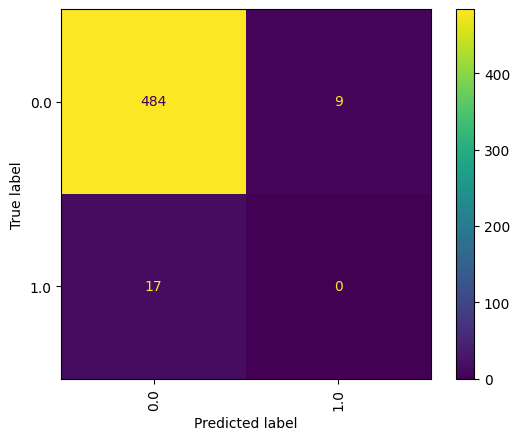

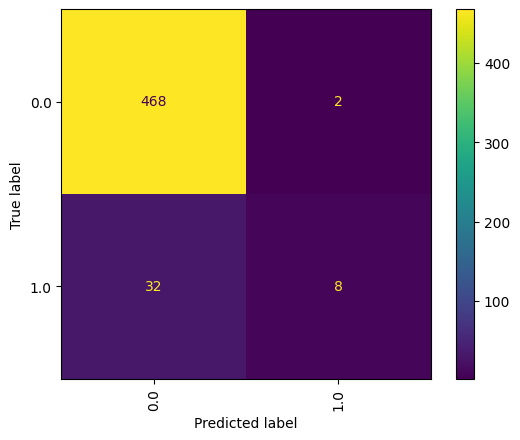

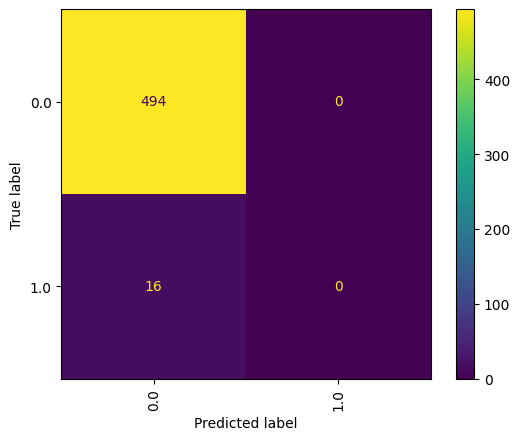

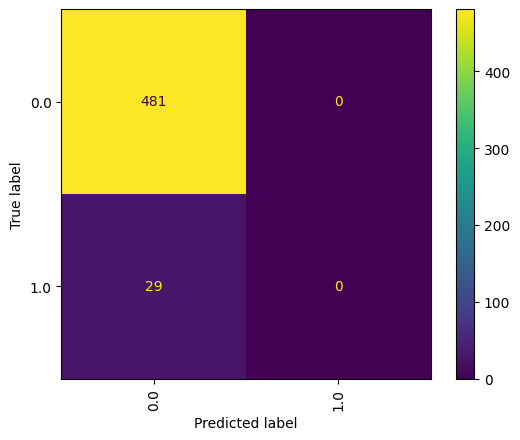

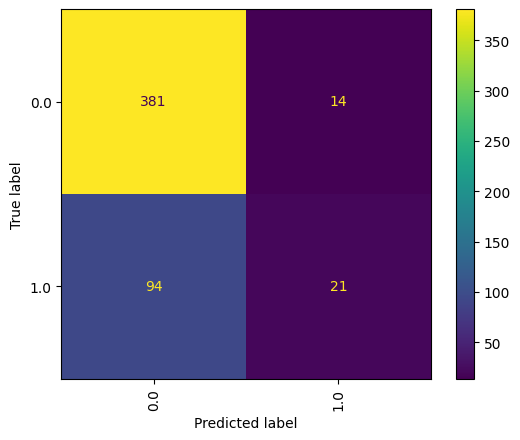

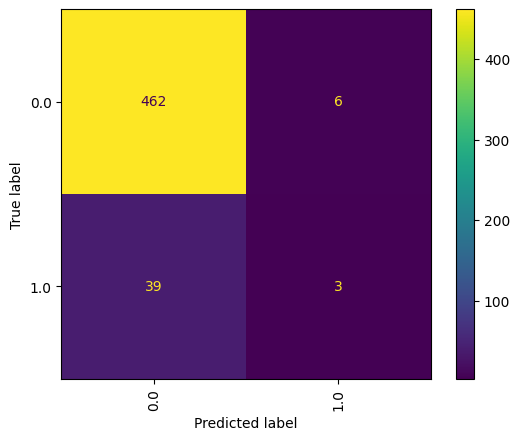

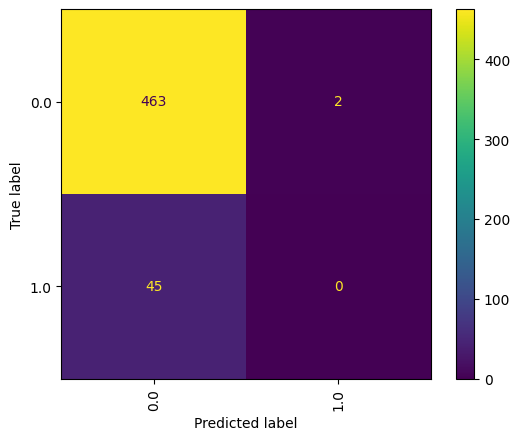

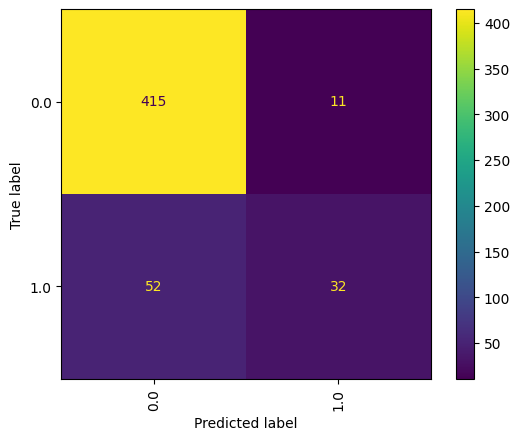

In [32]:
print("Dataset não padronizado")
linear_classification_model_multiOutput(idf)


Dataset normalizado
accuracy: 0.8784313725490196


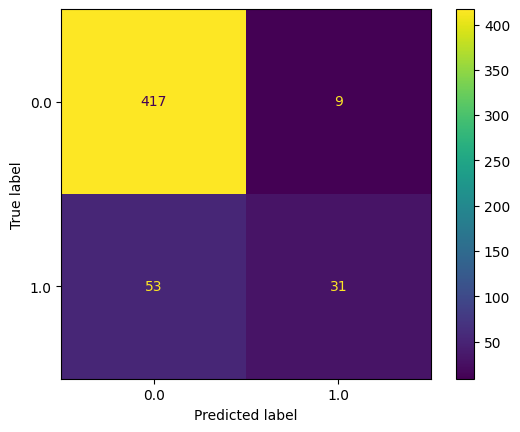

In [33]:
print("Dataset normalizado")
linear_classification_model(idf_normalized)


Dataset normalizado
accuracy: 0.4764705882352941


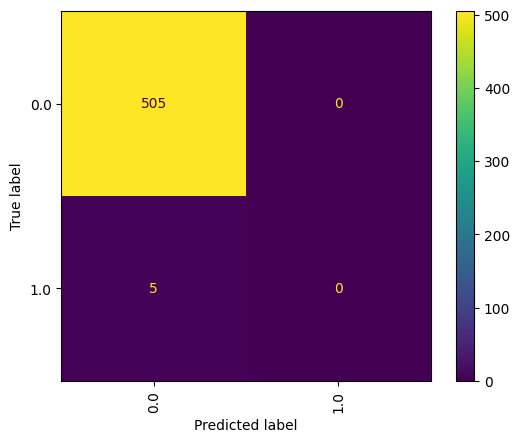

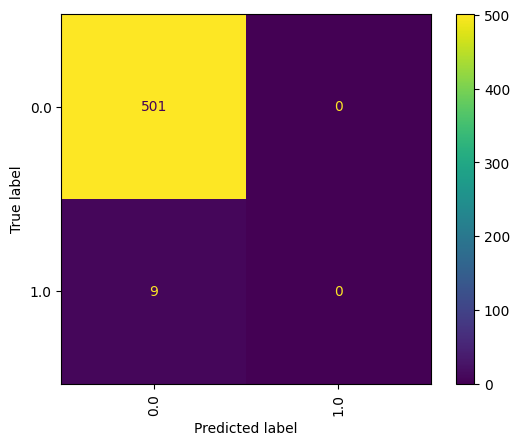

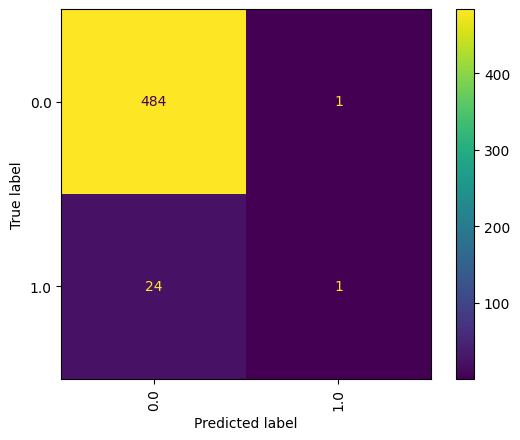

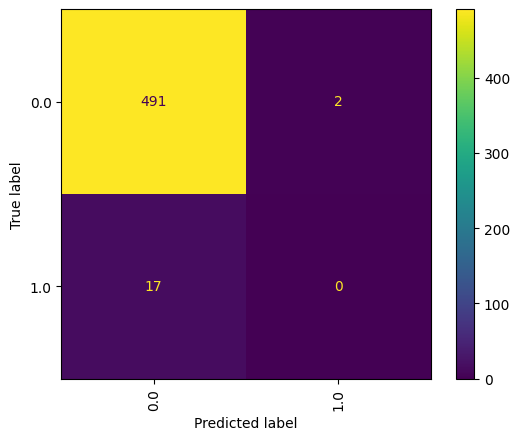

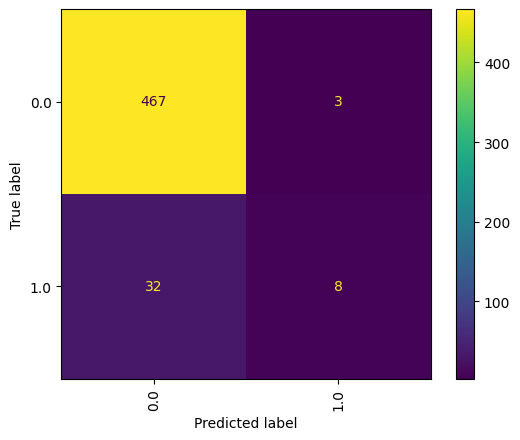

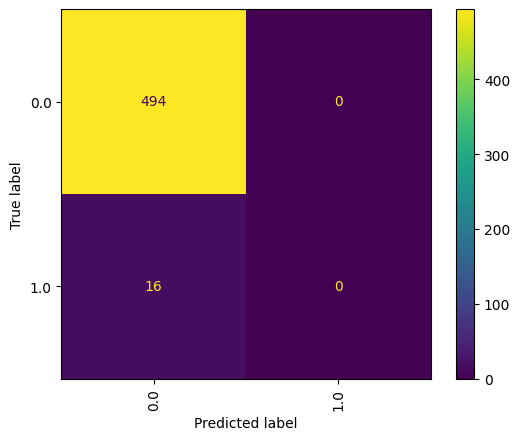

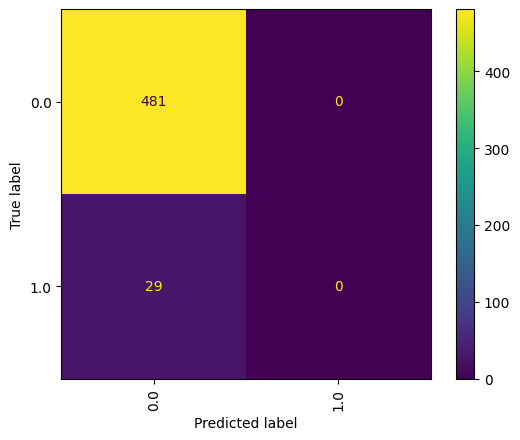

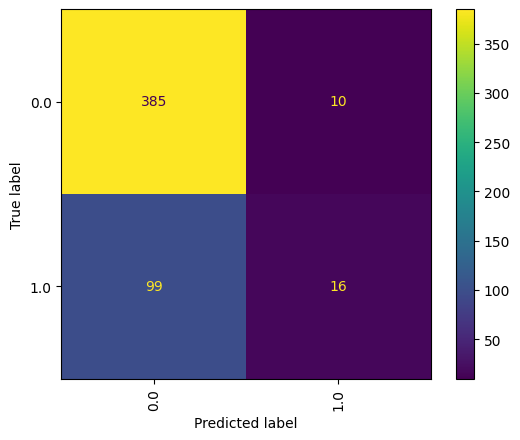

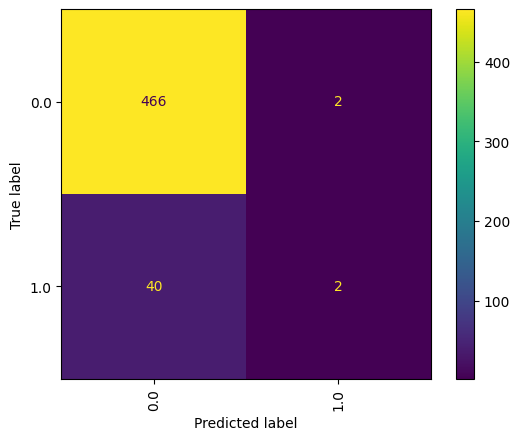

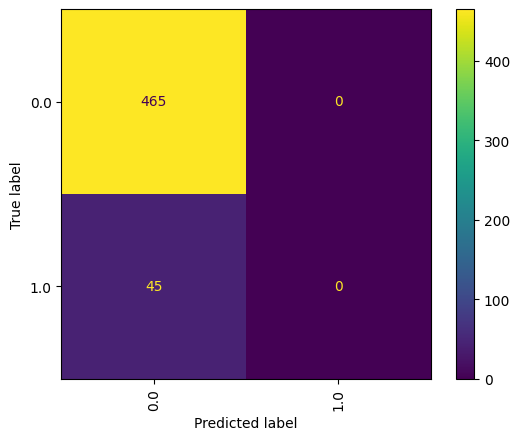

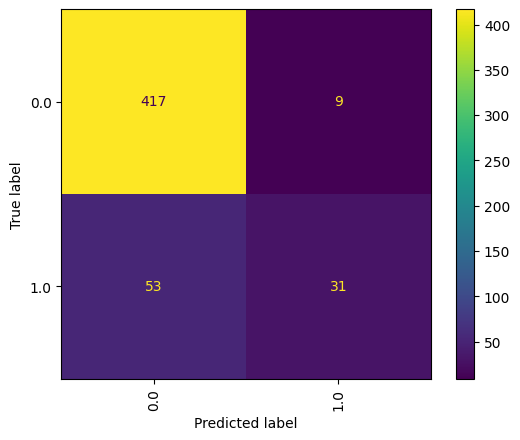

In [34]:
print("Dataset normalizado")
linear_classification_model_multiOutput(idf_normalized)
